Perform the data exploration step (i.e. evaluate your data, # of observations, details about your data distributions, scales, missing data, column descriptions)
Plot your data. For tabular data, you will need to run scatters, for image data, you will need to plot your example classes.
How will you preprocess your data? You should explain this in your README.md file and link your Jupyter notebook to it. All code and  Jupyter notebooks have be uploaded to your repo.
You must also include in your Jupyter Notebook, a link for data download and environment setup requirements:
              !wget !unzip like functions as well as !pip install functions for non standard libraries not available in colab are required to be in the top section of your jupyter lab notebook. Or having the data on GitHub (you will need the academic license for GitHub to do this, larger datasets will require a link to external storage).

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('tsla_2014_2023.csv')
df.describe()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,94.098510,96.172733,91.865096,94.072491,1.131986e+08,53.058382,52.862457,9.809933,13.202457,91.810735,91.806751,89.542873,89.547927,0.647230,93.162246,4.699351,4.680234,4.656461,94.167250
std,108.593936,111.022486,105.911918,108.500301,7.547433e+07,18.239752,13.352063,100.975002,109.285239,106.581797,106.094893,104.809940,103.979872,6.325994,107.718086,6.581929,5.858869,5.762082,108.530957
min,9.366667,9.800000,9.111333,9.289333,1.062000e+07,6.395305,16.564126,-233.333333,-297.930166,9.490973,9.813725,10.494240,9.674284,-25.271333,9.740800,0.135334,0.257427,0.315794,9.289333
25%,15.763167,16.082168,15.491167,15.814167,6.643185e+07,39.859440,43.595435,-76.876737,-78.543937,15.496080,15.446697,15.356488,15.594446,-0.392822,15.733792,0.496333,0.569335,0.577166,15.822167
50%,21.801001,22.198334,21.487666,21.877667,9.320775e+07,53.226417,51.621434,19.823624,24.702835,21.563733,21.575870,21.106043,21.195890,0.098391,21.859567,0.894001,0.833601,0.805047,21.881334
75%,200.017505,204.525829,194.482498,200.049999,1.323710e+08,65.900330,61.937068,94.426550,99.180514,192.341650,196.465729,194.728575,194.154595,1.094057,199.300335,7.700836,9.021824,9.291728,200.844997
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08,97.460910,94.197983,233.333333,350.643337,357.870532,344.030730,330.935132,321.063884,38.067930,373.152498,54.326660,24.512656,22.793229,409.970001


In [ ]:
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2014-01-02,9.986667,10.165333,9.770000,10.006667,92826000,55.344071,54.440118,-37.373644,15.213422,9.682107,9.820167,10.494240,9.674284,0.169472,9.740800,0.395333,0.402641,0.447550,9.970667
1,2014-01-03,10.000000,10.146000,9.906667,9.970667,70425000,53.742629,53.821521,-81.304471,17.481130,9.652800,9.826069,10.495693,9.680190,0.162623,9.776167,0.239333,0.379311,0.432677,9.800000
2,2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,9.629467,9.825047,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333
3,2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,9.597747,9.830235,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333
4,2014-01-08,9.923333,10.246667,9.917333,10.085333,92448000,58.368660,55.423026,60.799662,43.570559,9.573240,9.840239,10.511147,9.695964,0.140837,9.870167,0.329334,0.364060,0.413908,9.835333


In [ ]:
df.shape

(2516, 20)

In [ ]:
for c in df.columns:
    c = df[[c]]
    print(c.isna().sum())
#someone else can fstring and clean up output

date    0
dtype: int64
open    0
dtype: int64
high    0
dtype: int64
low    0
dtype: int64
close    0
dtype: int64
volume    0
dtype: int64
rsi_7    0
dtype: int64
rsi_14    0
dtype: int64
cci_7    0
dtype: int64
cci_14    0
dtype: int64
sma_50    0
dtype: int64
ema_50    0
dtype: int64
sma_100    0
dtype: int64
ema_100    0
dtype: int64
macd    0
dtype: int64
bollinger    0
dtype: int64
TrueRange    0
dtype: int64
atr_7    0
dtype: int64
atr_14    0
dtype: int64
next_day_close    0
dtype: int64


In [ ]:
sns.pairplot(df, diag_kind='kde')

<Axes: >

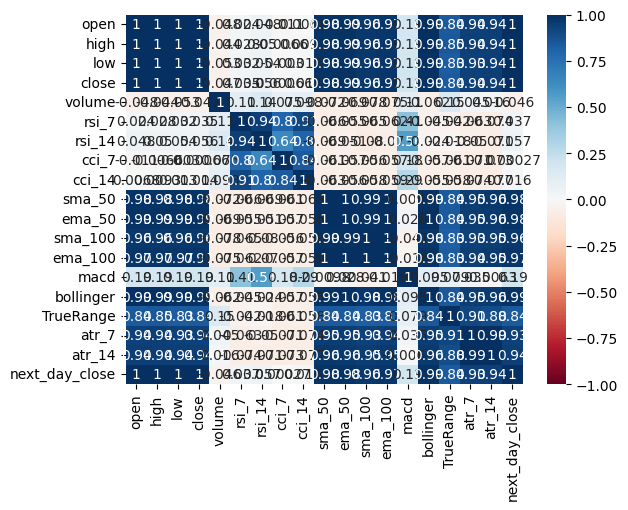

In [9]:
corr = df.drop(columns="date").corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu') # dont know how to fix the formatting of this

# citations (format later)
https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe